# CSCI 5901 - Special Topics in Applied CS

## Abhinandan Walia – B00820613, Manpreet Singh – B00821998

In [0]:
!pip install geopandas
!pip install plotly
!pip install mapclassify

In [0]:
import geopandas as gpd
import numpy as np
import pandas as pd
from pandas import Grouper
from shapely.geometry import Point, Polygon
import shapely
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import DBSCAN

### Reading data from AISData and Assignment3shapefile

In [0]:
df=pd.read_csv('AISData.csv')
portData=gpd.read_file('assignment3shapefile.shp')

## Data in AISData file
Note: The names of column location.coordinates.0 and location.coordinates.1 has been changed to x and y respectively

In [0]:
df.head(20)

,Unnamed: 0,event_time,x,y,position_accuracy,mmsi,sog,cog
0,0,2019-04-11T09:47:30.153Z,-63.556082,44.624835,0.0,316013808,3.0,319.500000
1,1,2019-04-11T09:47:27.273Z,-63.556053,44.624817,0.0,316013808,3.0,320.700012
2,2,2019-04-11T09:47:34.340Z,-63.556138,44.624868,0.0,316013808,2.9,319.500000
3,3,2019-04-11T09:47:37.087Z,-63.556187,44.624898,0.0,316013808,3.0,319.799988
4,4,2019-04-19T09:52:19.358Z,-63.555998,44.624883,0.0,316013808,3.2,337.200012
5,5,2019-04-19T09:52:19.358Z,-63.555998,44.624883,0.0,316013808,3.2,337.200012
6,6,2019-05-25T19:40:53.826Z,-63.555967,44.624998,0.0,316013808,1.5,168.399994
7,7,2019-05-21T21:39:50.762Z,-63.555977,44.625048,0.0,316013808,4.3,134.600006
8,8,2019-04-09T10:13:59.833Z,-63.555918,44.625118,0.0,316013808,3.9,312.399994
9,9,2019-04-09T10:13:55.860Z,-63.555845,44.625072,0.0,316013808,4.3,310.600006


## Displaying the data of the shape file which contains location of different ports

In [0]:
portData

,field_1,port_name,size,geometry
0,0,pointpolygon,0.0000,"POLYGON ((-63.59160304069519 44.6649292254607,..."
1,1,port1,0.0018,"POLYGON ((-63.569431 44.649993, -63.5694396674..."
2,2,port2,0.0018,"POLYGON ((-63.60949000000001 44.675853, -63.60..."
3,3,ind,0.0000,POLYGON ((-63.54742169380188 44.64697911403847...
4,4,port5,0.0018,"POLYGON ((-63.568048 44.663875, -63.5680566674..."
5,5,port6,0.0018,"POLYGON ((-63.555828 44.662453, -63.5558366674..."
6,6,port7,0.0018,"POLYGON ((-63.547843 44.648763, -63.5478516674..."
7,7,south_enterance,0.0000,POLYGON ((-63.50715637207031 44.59572358282151...
8,8,auto_port,0.0015,"POLYGON ((-63.50949499999999 44.62011, -63.509..."
9,9,southend container terminal,0.0050,"POLYGON ((-63.55805200000001 44.63004, -63.558..."


## Using the GeoDataFrame and plotting the Latitute and Longitude position of vessels from AISData file

Reference: Lab 5

In [0]:
gdf = gpd.GeoDataFrame(df.drop(["x", "y"], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(df.x, df.y)])

## Plotting the data of the vessels from AISdata

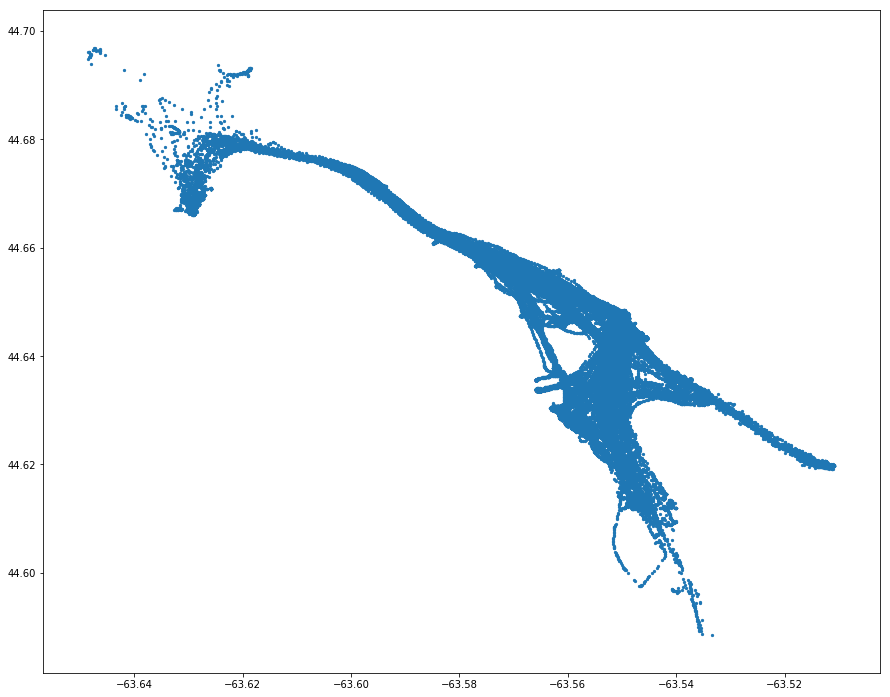

In [0]:
vesselsData = gdf.plot(figsize=(15,15),markersize=5)

## Using the data from shape file
#### Index set on column port_name used to plot all the ports in the shape file

Reference: Lab 5

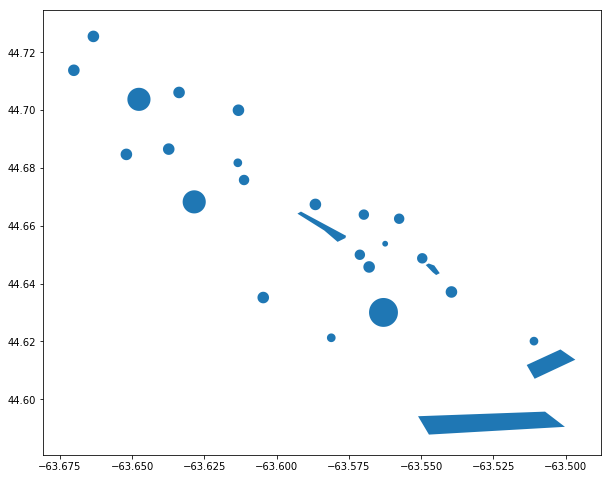

In [0]:
portName=portData.set_index(['port_name'])
portName.plot(figsize=(10,10))

### Finding buffer without centroid
Reference: Lab 5

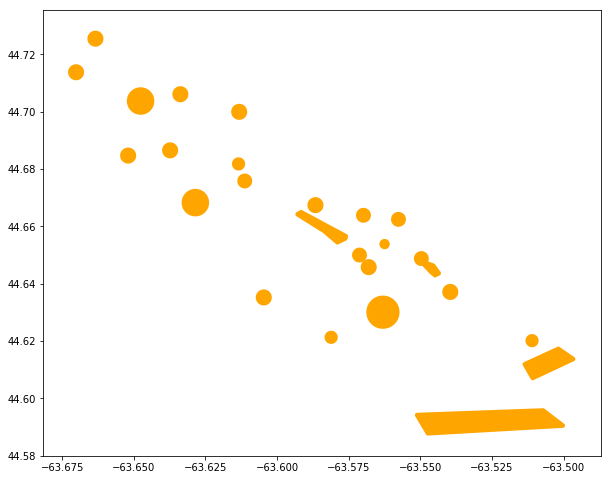

In [0]:
buffers=portData.buffer(0.0008)
buffers.plot(figsize=(10,10),color='orange',markersize=50)

### Finding Centroid for each port and creating buffer
Reference: Lab 5


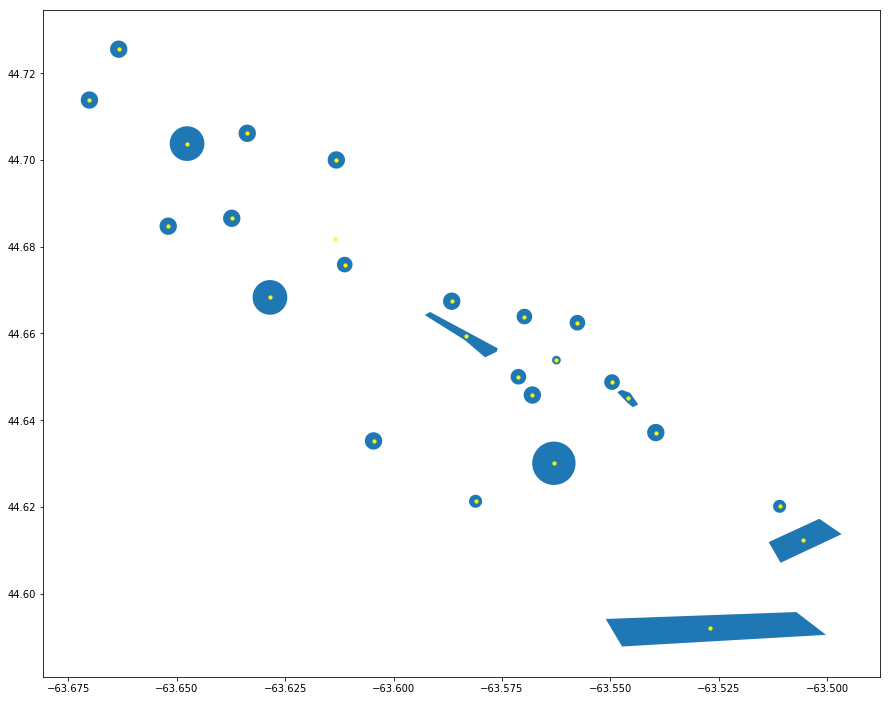

In [0]:
p1=portName.loc[['waterfront h'],:].centroid
p2=portName.loc[['Fairview cove'],:].centroid
p3=portName.loc[['pointpolygon'],:].centroid
p4=portName.loc[['port1'],:].centroid
p5=portName.loc[['port2'],:].centroid
p6=portName.loc[['ind'],:].centroid
p7=portName.loc[['port5'],:].centroid
p8=portName.loc[['port6'],:].centroid
p9=portName.loc[['port7'],:].centroid
p10=portName.loc[['south_enterance'],:].centroid
p11=portName.loc[['auto_port'],:].centroid
p12=portName.loc[['southend container terminal'],:].centroid
p13=portName.loc[['NN Jetty'],:].centroid
p14=portName.loc[['Bills island'],:].centroid
p15=portName.loc[['mid bedford'],:].centroid
p16=portName.loc[['armament'],:].centroid
p17=portName.loc[['northarm'],:].centroid
p18=portName.loc[['plll'],:].centroid
p19=portName.loc[['pp'],:].centroid
p20=portName.loc[['po001'],:].centroid
p21=portName.loc[['po002'],:].centroid
p22=portName.loc[['oulier_maybecday'],:].centroid
p23=portName.loc[['p003'],:].centroid
p24=portName.loc[['enter2'],:].centroid
p25=portName.loc[['p009'],:].centroid
p26=portName.loc[['p010'],:].centroid


ax=portName.loc[['waterfront h','Fairview cove','pointpolygon','port1','port2','ind','port5','port6','port7',
                 'south_enterance','auto_port','southend container terminal','NN Jetty','Bills island','mid bedford',
                 'armament','northarm','plll','pp','po001','oulier_maybecday','p003','enter2','p009','p010'],:].plot(figsize=(15,15))

gpd.GeoSeries([p1[0],p2[0],p3[0],p4[0],p5[0],p6[0],p7[0],p8[0],p9[0],p10[0],p11[0],p12[0],p13[0],p14[0],p15[0],p16[0],p17[0],p18[0],p19[0],p20[0],p21[0],p22[0],p23[0],p24[0],p25[0],p26[0]]).plot(ax=ax,color='yellow',markersize=10)

### Finding buffer and Plot
Reference: Lab 5

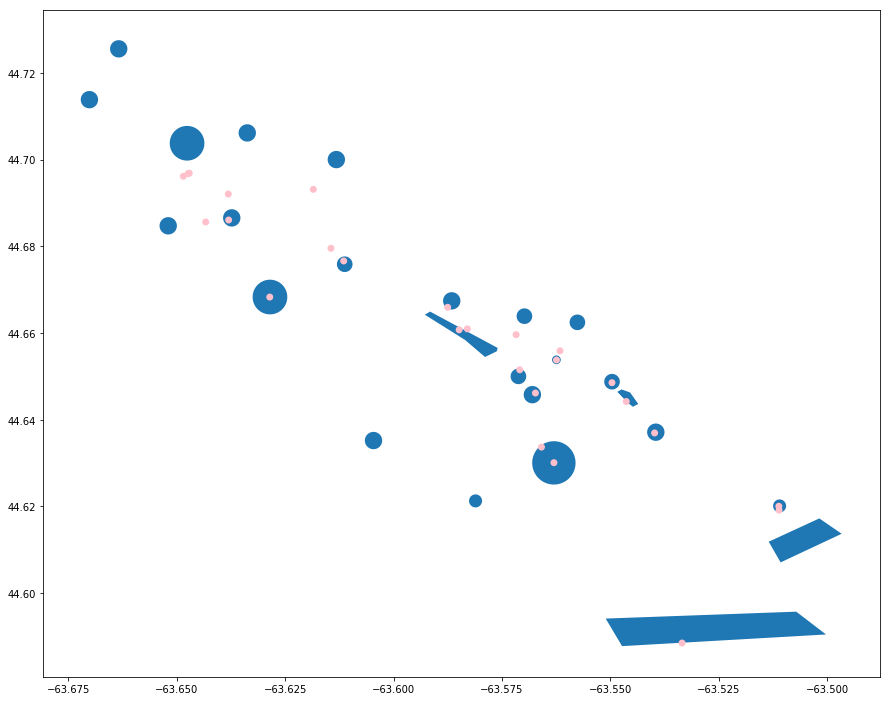

In [0]:
pp1=gdf.loc[gdf.distance(p1[0])==gdf.distance(p1[0]).min(),:]
pp2=gdf.loc[gdf.distance(p2[0])==gdf.distance(p2[0]).min(),:]
pp3=gdf.loc[gdf.distance(p3[0])==gdf.distance(p3[0]).min(),:]
pp4=gdf.loc[gdf.distance(p4[0])==gdf.distance(p4[0]).min(),:]
pp5=gdf.loc[gdf.distance(p5[0])==gdf.distance(p5[0]).min(),:]
pp6=gdf.loc[gdf.distance(p6[0])==gdf.distance(p6[0]).min(),:]
pp7=gdf.loc[gdf.distance(p7[0])==gdf.distance(p7[0]).min(),:]
pp8=gdf.loc[gdf.distance(p8[0])==gdf.distance(p8[0]).min(),:]
pp9=gdf.loc[gdf.distance(p9[0])==gdf.distance(p9[0]).min(),:]
pp10=gdf.loc[gdf.distance(p10[0])==gdf.distance(p10[0]).min(),:]
pp11=gdf.loc[gdf.distance(p11[0])==gdf.distance(p11[0]).min(),:]
pp12=gdf.loc[gdf.distance(p12[0])==gdf.distance(p12[0]).min(),:]
pp13=gdf.loc[gdf.distance(p13[0])==gdf.distance(p13[0]).min(),:]
pp14=gdf.loc[gdf.distance(p14[0])==gdf.distance(p14[0]).min(),:]
pp15=gdf.loc[gdf.distance(p15[0])==gdf.distance(p15[0]).min(),:]
pp16=gdf.loc[gdf.distance(p16[0])==gdf.distance(p16[0]).min(),:]
pp17=gdf.loc[gdf.distance(p17[0])==gdf.distance(p17[0]).min(),:]
pp18=gdf.loc[gdf.distance(p18[0])==gdf.distance(p18[0]).min(),:]
pp19=gdf.loc[gdf.distance(p19[0])==gdf.distance(p19[0]).min(),:]
pp20=gdf.loc[gdf.distance(p20[0])==gdf.distance(p20[0]).min(),:]
pp21=gdf.loc[gdf.distance(p21[0])==gdf.distance(p21[0]).min(),:]
pp22=gdf.loc[gdf.distance(p22[0])==gdf.distance(p22[0]).min(),:]
pp23=gdf.loc[gdf.distance(p23[0])==gdf.distance(p23[0]).min(),:]
pp24=gdf.loc[gdf.distance(p24[0])==gdf.distance(p24[0]).min(),:]
pp25=gdf.loc[gdf.distance(p25[0])==gdf.distance(p25[0]).min(),:]
pp26=gdf.loc[gdf.distance(p26[0])==gdf.distance(p26[0]).min(),:]

ax=portName.loc[['waterfront h','Fairview cove','pointpolygon','port1','port2','ind','port5','port6','port7',
                 'south_enterance','auto_port','southend container terminal','NN Jetty','Bills island','mid bedford',
                 'armament','northarm','plll','pp','po001','oulier_maybecday','p003','enter2','p009','p010'],:].plot(figsize=(15,15))

pp1=pp1.iloc[0,:].geometry.buffer(0.0008)
pp2=pp2.iloc[0,:].geometry.buffer(0.0008)
pp3=pp3.iloc[0,:].geometry.buffer(0.0008)
pp4=pp4.iloc[0,:].geometry.buffer(0.0008)
pp5=pp5.iloc[0,:].geometry.buffer(0.0008)
pp6=pp6.iloc[0,:].geometry.buffer(0.0008)
pp7=pp7.iloc[0,:].geometry.buffer(0.0008)
pp8=pp8.iloc[0,:].geometry.buffer(0.0008)
pp9=pp9.iloc[0,:].geometry.buffer(0.0008)
pp10=pp10.iloc[0,:].geometry.buffer(0.0008)
pp11=pp11.iloc[0,:].geometry.buffer(0.0008)
pp12=pp12.iloc[0,:].geometry.buffer(0.0008)
pp13=pp13.iloc[0,:].geometry.buffer(0.0008)
pp14=pp14.iloc[0,:].geometry.buffer(0.0008)
pp15=pp15.iloc[0,:].geometry.buffer(0.0008)
pp16=pp16.iloc[0,:].geometry.buffer(0.0008)
pp17=pp17.iloc[0,:].geometry.buffer(0.0008)
pp18=pp18.iloc[0,:].geometry.buffer(0.0008)
pp19=pp19.iloc[0,:].geometry.buffer(0.0008)
pp20=pp20.iloc[0,:].geometry.buffer(0.0008)
pp21=pp21.iloc[0,:].geometry.buffer(0.0008)
pp22=pp22.iloc[0,:].geometry.buffer(0.0008)
pp23=pp23.iloc[0,:].geometry.buffer(0.0008)
pp24=pp24.iloc[0,:].geometry.buffer(0.0008)
pp25=pp25.iloc[0,:].geometry.buffer(0.0008)
pp26=pp26.iloc[0,:].geometry.buffer(0.0008)

gpd.GeoSeries([pp1,pp2,pp3,pp4,pp5,pp6,pp7,pp8,pp9,pp10,pp11,pp12,pp13,pp14,pp15,pp16,pp17,pp18,pp19,pp20,pp21,pp22,pp23,pp24,pp25,pp26]).plot(ax=ax,color='pink',markersize=400)


### Extracting polygon geometry from the buffers in order to compare it to the port locations later:

In [0]:
bufferGeoFrame=gpd.GeoDataFrame({"geometry":buffers})
bufferGeoFrame.head()

,geometry
0,POLYGON ((-63.59201040026203 44.66561774429363...
1,POLYGON ((-63.56863196363503 44.65003225413946...
2,POLYGON ((-63.60869096363504 44.67589225413943...
3,POLYGON ((-63.54780449856828 44.64768158148314...
4,POLYGON ((-63.56724896363504 44.66391425413949...


### Comparing the location coordinates  from the buffers with location coordinates in AISdata

A flag "vesselFound" has been used to find out that whether a vessel exists within a port or not.

Reference: https://automating-gis-processes.github.io/2017/lessons/L3/point-in-polygon.html

In [0]:
portGeometry=gdf['geometry'] #getting port coordinates
buffersGeometry=bufferGeoFrame["geometry"] #getting port coordinates in bufferGeoFrame
aisMsgs = []
coordinatelist = []

#initiating the list with vessel count 0 at all ports
for i in range(len(buffers)):
  coordinatelist.append(0)

for portGeometrys in portGeometry:
  count=0
  vesselFound='false'
  for buffersGeometrys in buffersGeometry:
    if buffersGeometrys.within(portGeometrys): #Vessel lies in the co-ordinates of the port 
      vesselFound='true'
      #Vessel lies within the port coordinates increment the vessel count
      coordinatelist[count]+=1
      aisMsgs.append(vesselFound)
      break
    count+=1
      
  if(vesselFound=='false'):
    aisMsgs.append(vesselFound)


#### Adding results into the GDF

In [0]:
gdf['Intersect_with_Port'] = aisMsgs

## Q1. Finding the vessels which visited the ports and vessels  intersecting with the ports

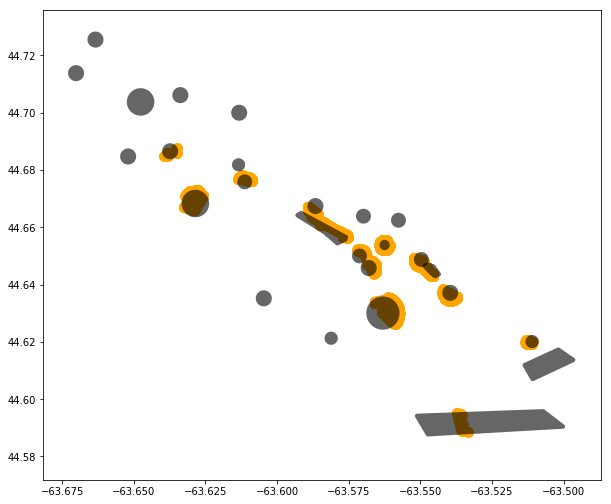

In [0]:
#Reference: https://matplotlib.org/3.1.1/gallery/recipes/fill_between_alpha.html
intersect_df = gdf[gdf['Intersect_with_Port']=='true']
ax = intersect_df.plot(figsize=(10,10),color="orange",markersize=100)
ax = buffers.plot(ax=ax,figsize=(10,10),color="k",alpha=0.5)

## Q2. Displaying density of each port using a plot

The count for the number of vessels visiting a port has been maintained in order to plot the density of vessels/messages in a port.

Reference:

https://residentmario.github.io/geoplot/user_guide/Customizing_Plots.html

http://geopandas.org/mapping.html

In [0]:
#creating a new dataframe with geometry and number of vessels at that coordinate
vessels_density=gpd.GeoDataFrame({"geometry":buffersGeometry})
vessels_density['density']=coordinatelist

#### Ploting density of messages/vessels at a port
Reference: http://geopandas.org/mapping.html#choropleth-maps

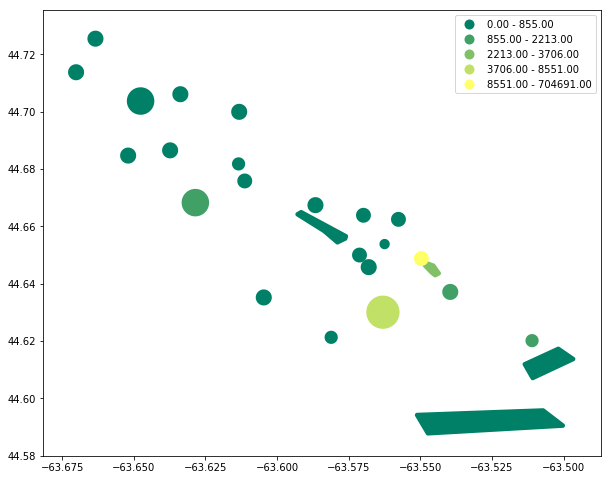

In [0]:
vessels_density.plot(column='density',legend=True, cmap='summer', scheme='fisher_jenks', figsize=(10,10))

## Q3 . Splitting data into one hour time intervals

Extracting the hour intervel of the message from AISData provided and adding into a new column in the GDF

In [0]:
event_time=gdf['event_time']
event_hours = []
for event in event_time:
  try:
    #11:13 start and end postion of the "Hours" in the event_time column
    event_hours.append(int(event[11:13]))
  except:
    #if an exception occurs event_hours are set as zero
    event_hours.append(0)
gdf['event_hours']=event_hours

#### Adding new column in bufferGeoFrame from shape file
Associating portName with 24 hour  with 1 hr interval

Reference: https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/

In [0]:
bufferGeoFrame['portName']=portData['port_name']

for i in range(24):
  # Adding new column into the dataframe assigning 0 vessels to each port on all interval of time
  colName = "hour"+ str(i)
  bufferGeoFrame[colName]=0

#### Finding the intersection between the PortName and Vessel over each hour
Reference: https://cmdlinetips.com/2018/12/how-to-loop-through-pandas-rows-or-how-to-iterate-over-pandas-rows/

https://automating-gis-processes.github.io/2017/lessons/L3/point-in-polygon.html

In [0]:
# intersect_df dataframe with interaction details on a port with time interval
intersect_df = gdf[gdf['Intersect_with_Port']=='true']

def findportinteraction(coordinate,hour):
  for indexInner, rowInner in bufferGeoFrame.iterrows():
    #finding the geometry of each record in bufferGeoFrame
    bufferCoord=rowInner['geometry'] 
    #compaing if the intersection is found vessel at that port on a given interval is incremented
    if coordinate.intersects(bufferCoord): 
      bufferGeoFrame.at[indexInner, hour]+=1
      break
      
for index,row in intersect_df.iterrows():
  #finding the geometry of each record in intersected messages
  coordinate = row['geometry']
  #finding the hour at which interaction of messages took place
  event_hr = row['event_hours']
  #creating hour string to match with the column name in the bufferGeoFrame
  hour = 'hour'+ str(event_hr)
  #function call for finding interation over a port on given hour
  findportinteraction(coordinate,hour)

### Ploting message interaction over ports in time interval

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


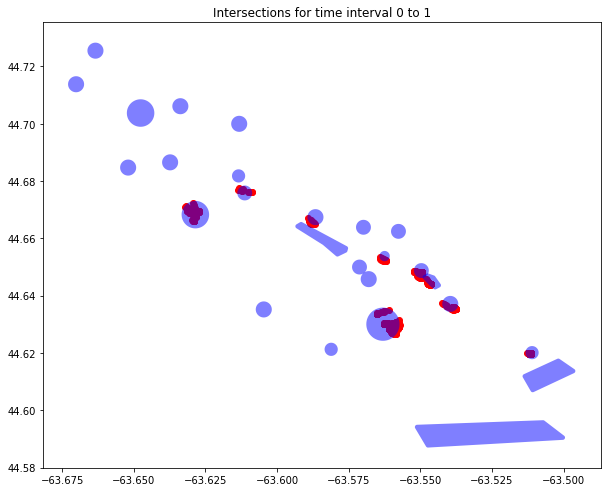

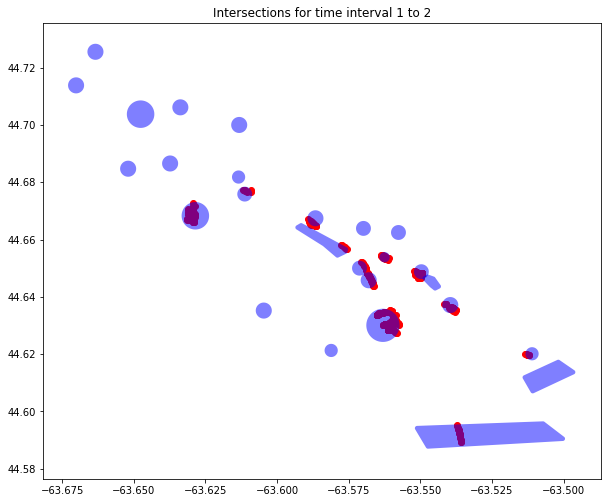

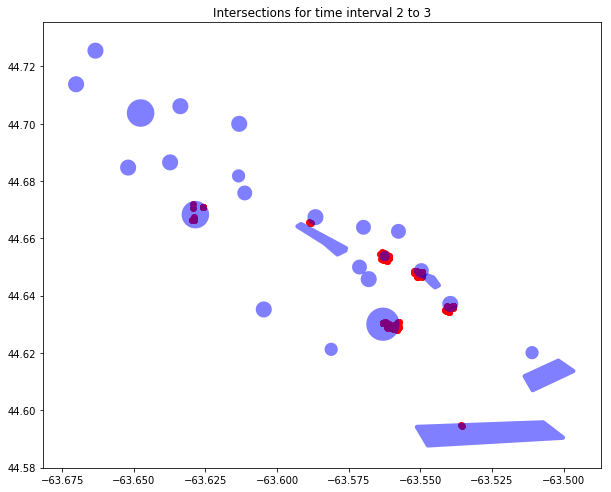

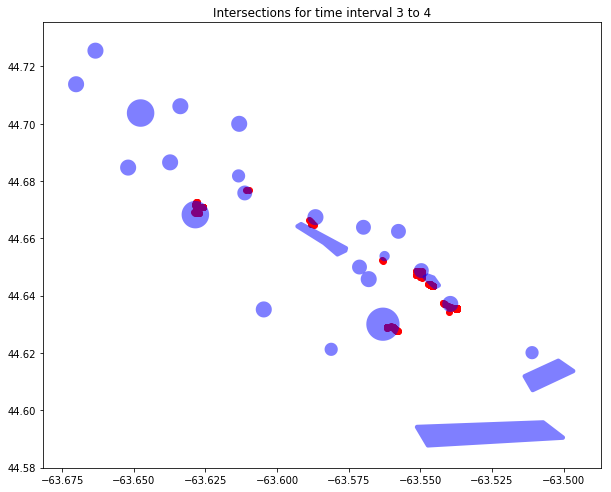

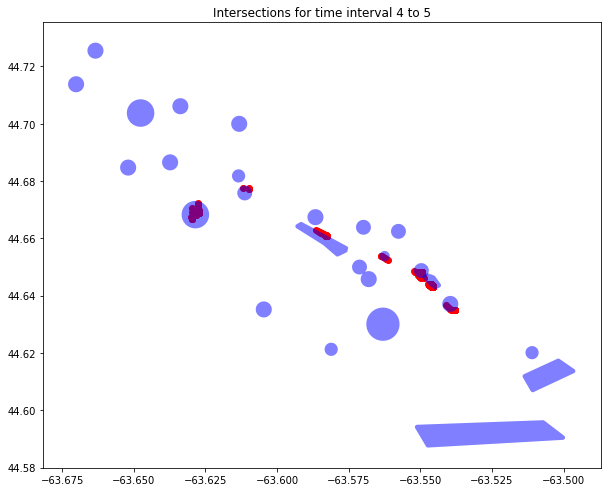

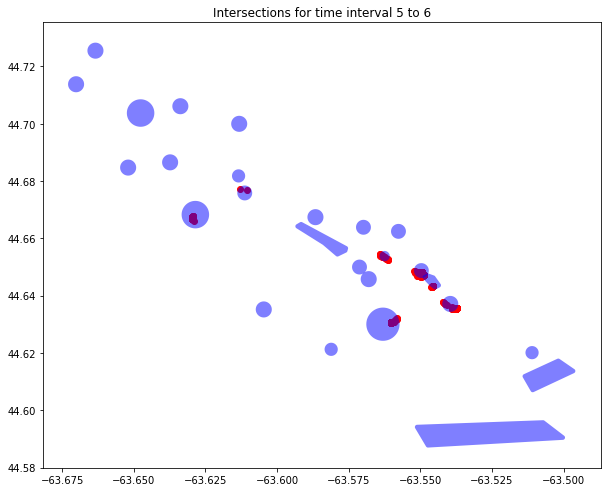

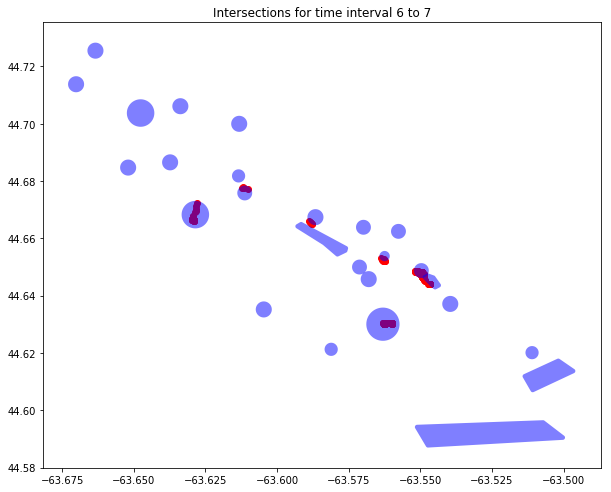

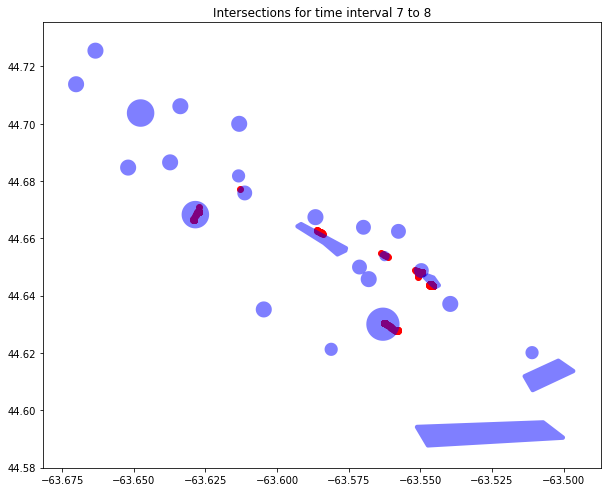

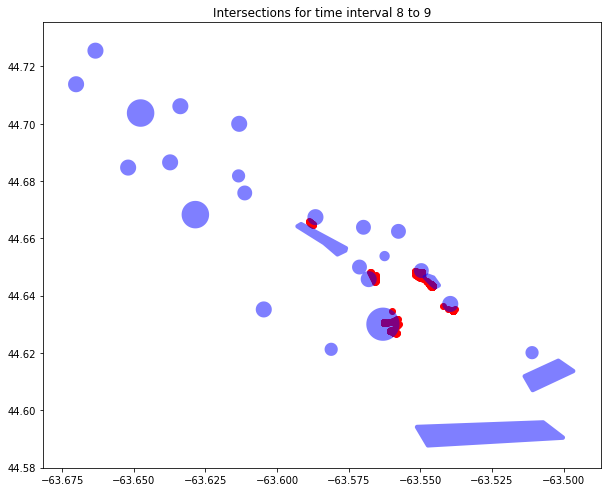

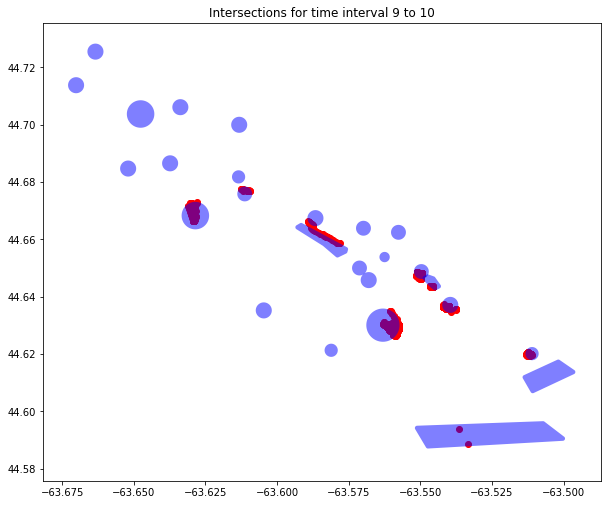

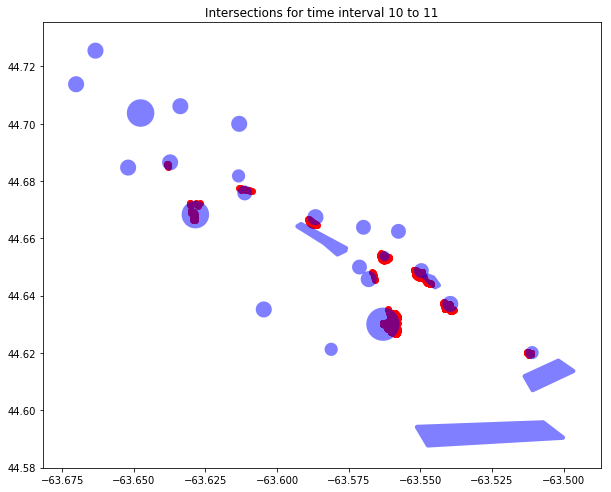

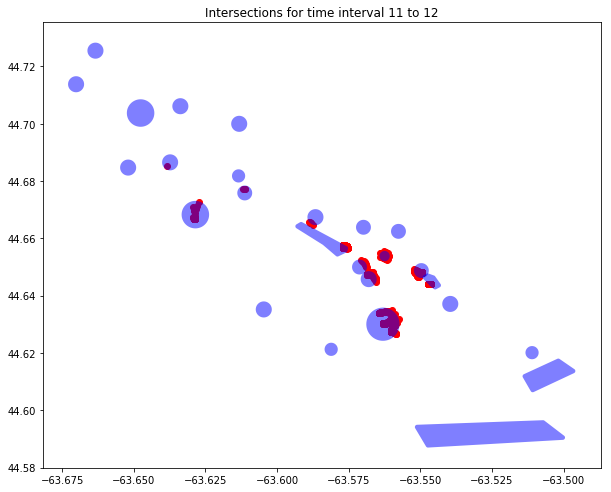

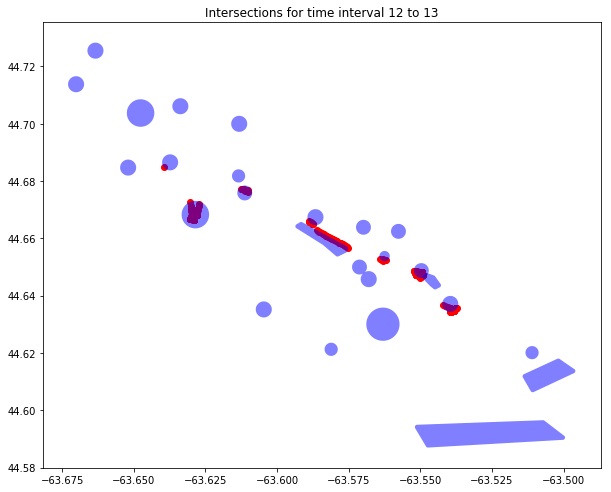

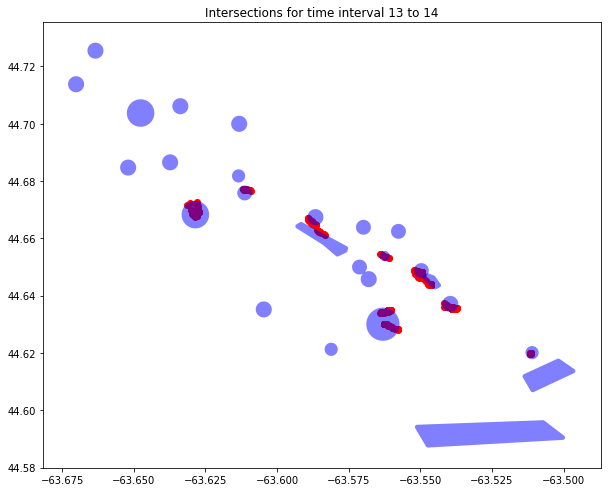

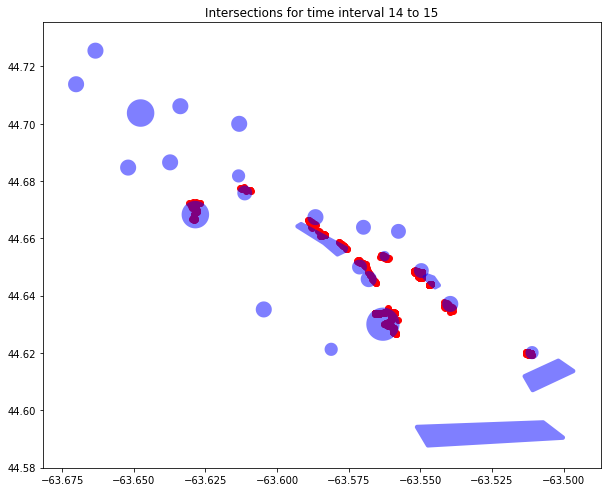

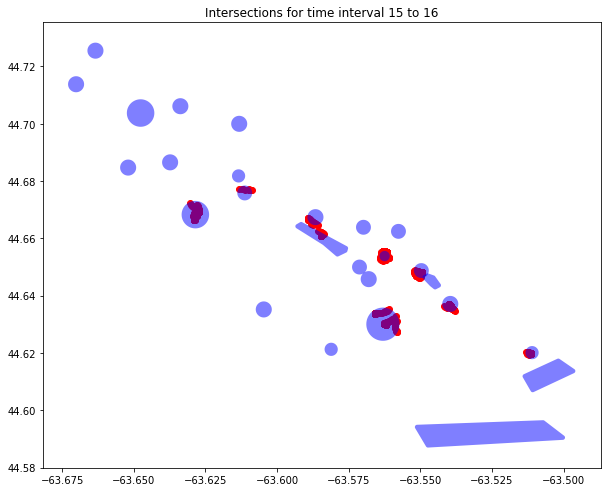

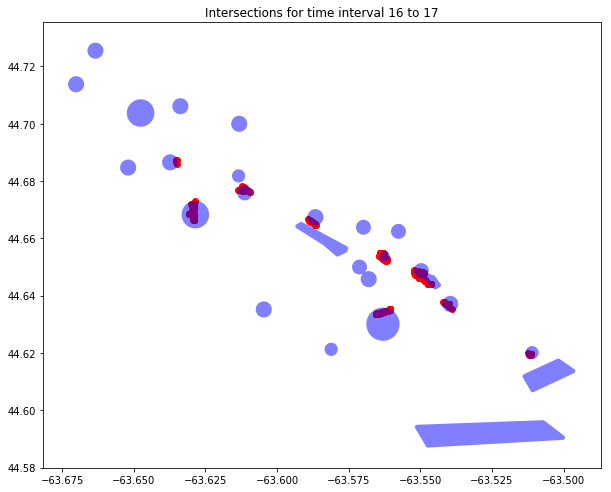

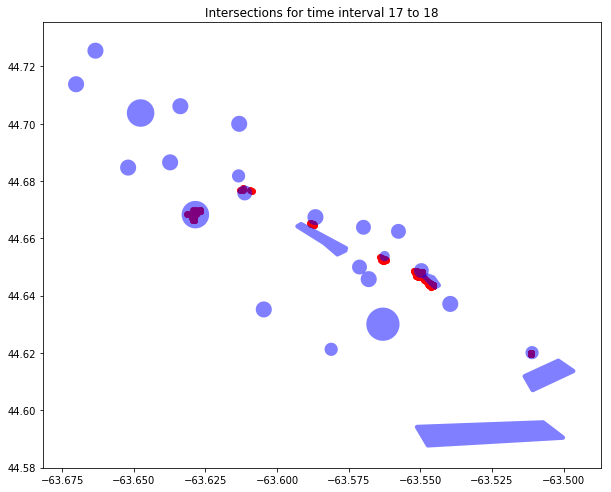

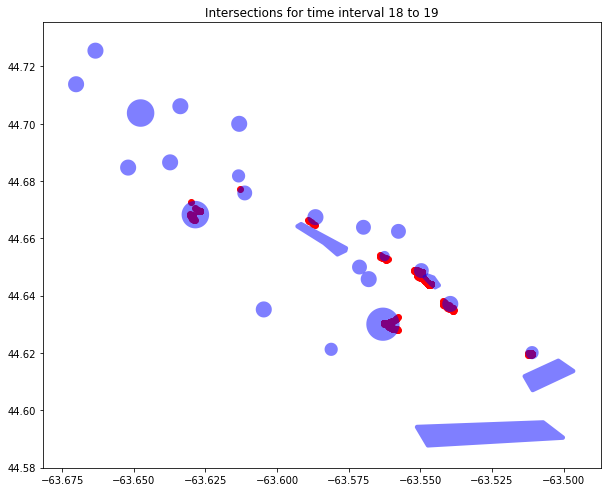

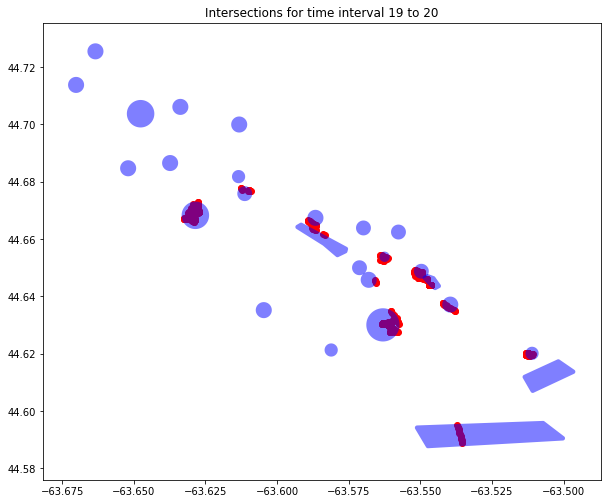

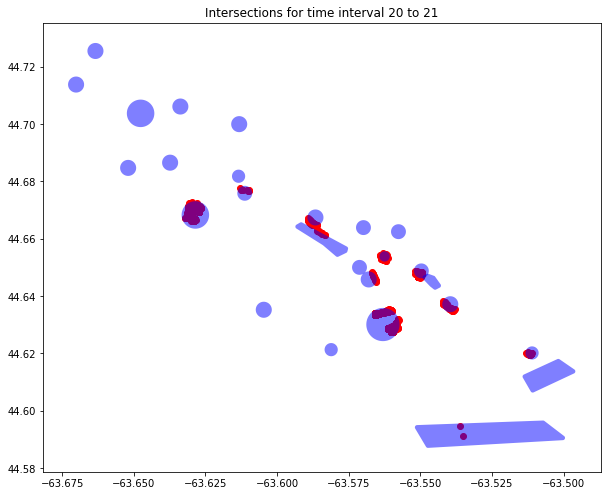

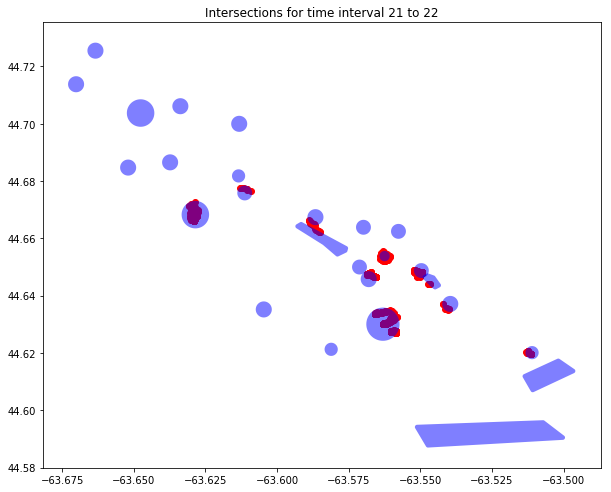

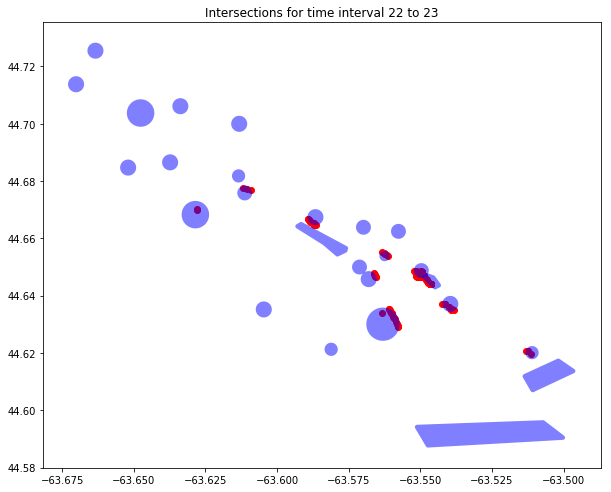

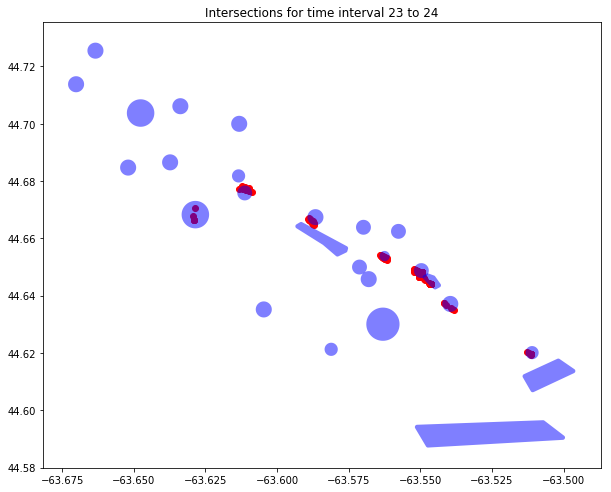

In [0]:
for hour in range(24):
  #extracting the data from intersection dataframe based on time interval
  gdf_interact_time = intersect_df[intersect_df['event_hours']==hour] 
  ax =gdf_interact_time.plot(figsize=(10,10), color="red")
  bufferGeoFrame.plot(ax=ax, color='blue', alpha=0.5)
  ax.set_title("Intersections for time interval "+str(hour)+" to "+ str(hour+1))

In [0]:
#adding density to the bufferGeoFrame
density=[]
bufferGeoFrame['density']=coordinatelist

### Ploting message density over  ports in time interval
Reference: http://geopandas.org/mapping.html#choropleth-maps

/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:138: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:140: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)
/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:140: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


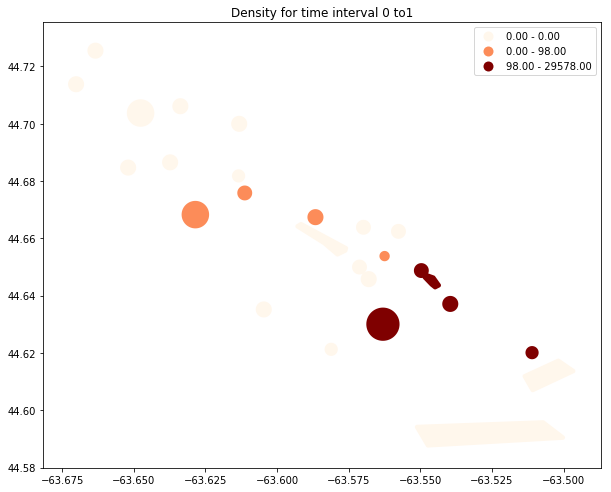

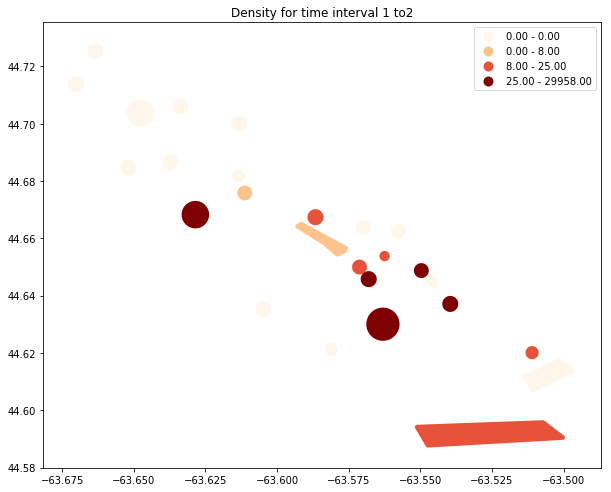

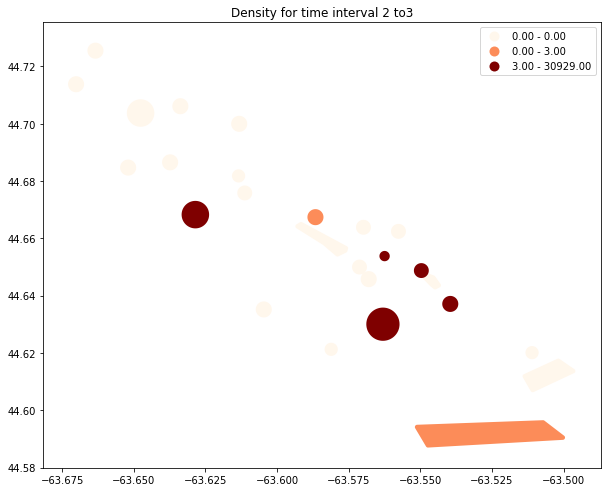

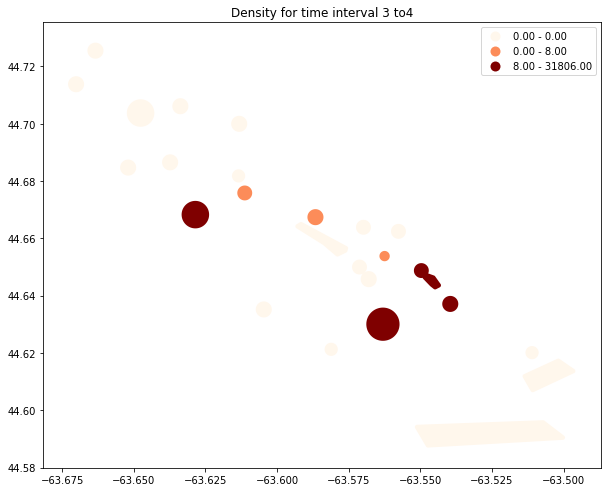

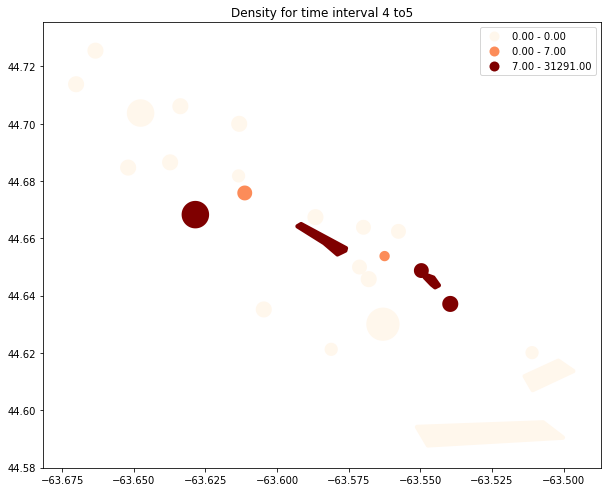

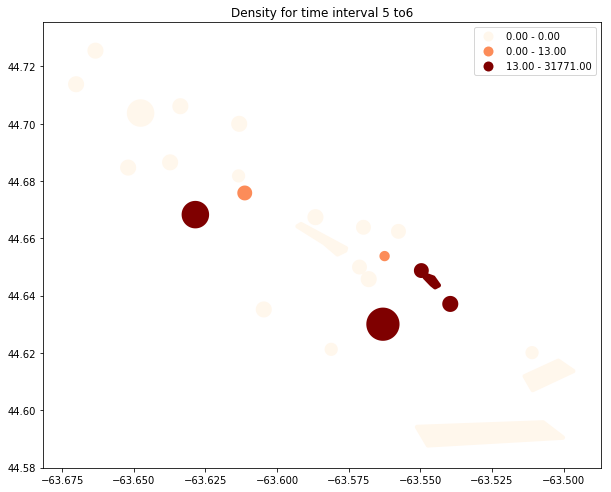

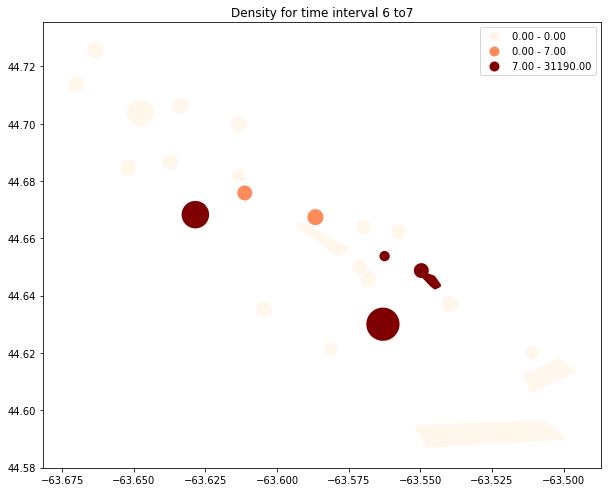

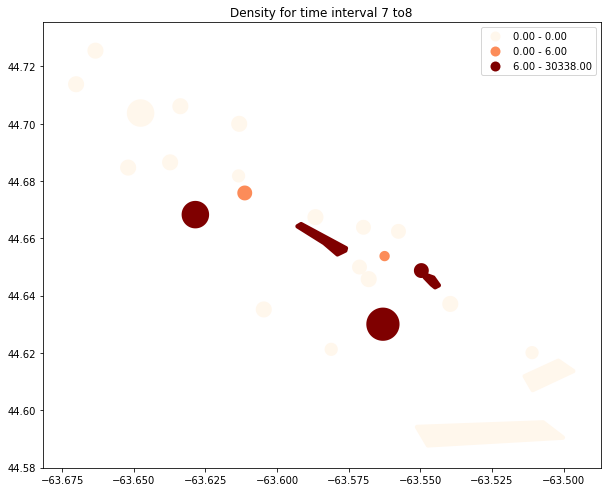

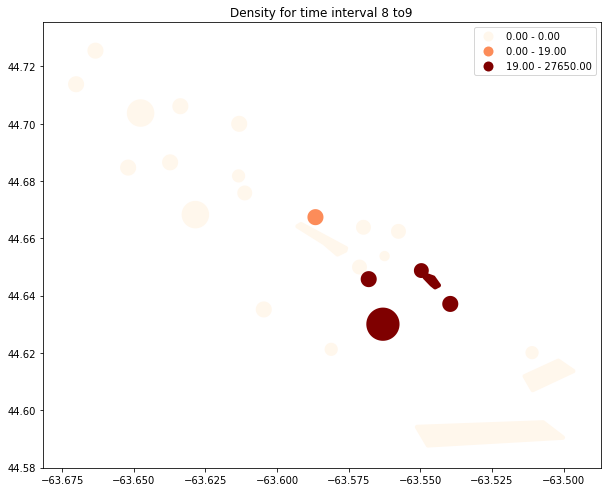

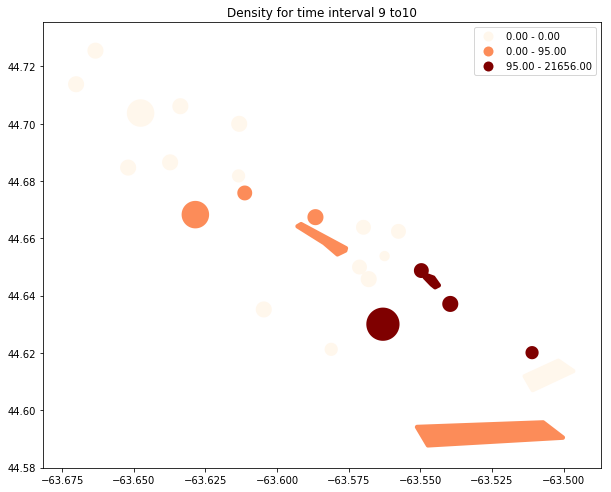

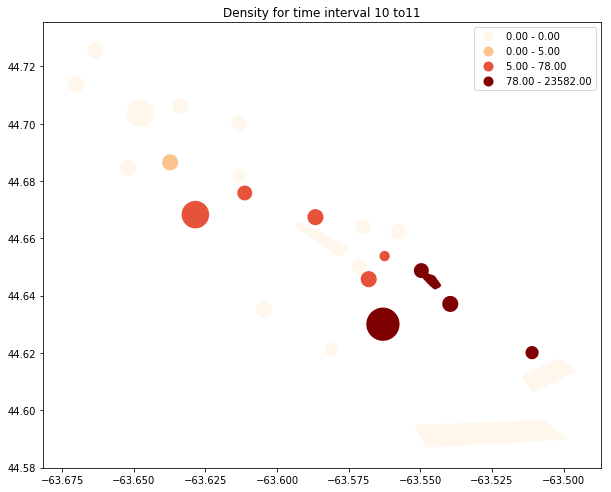

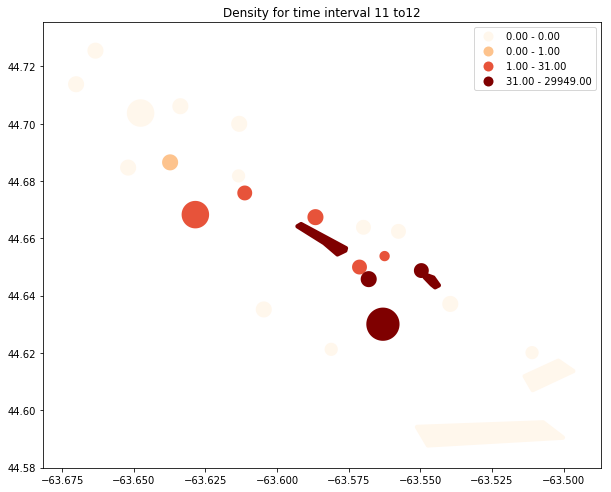

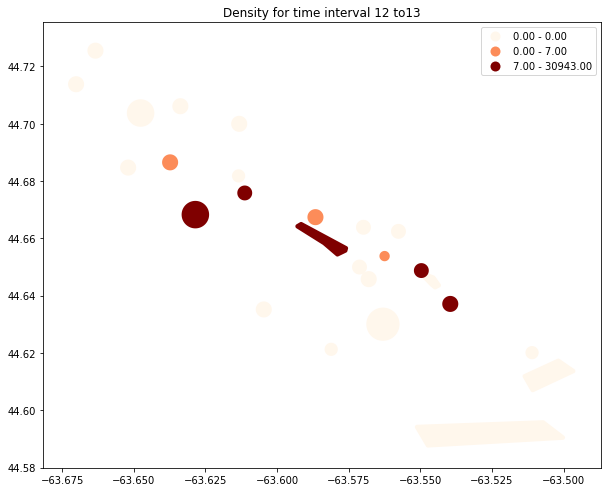

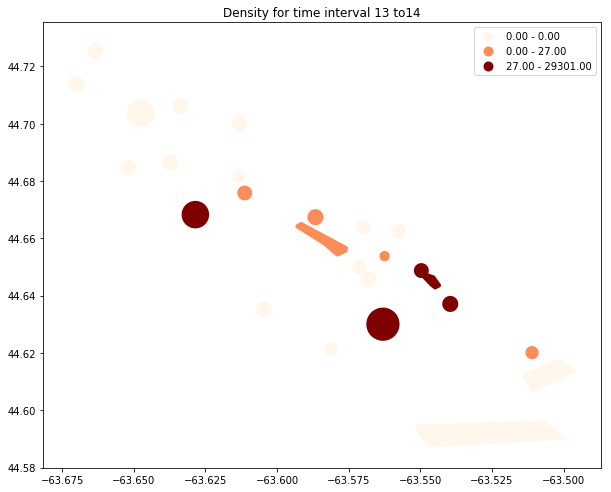

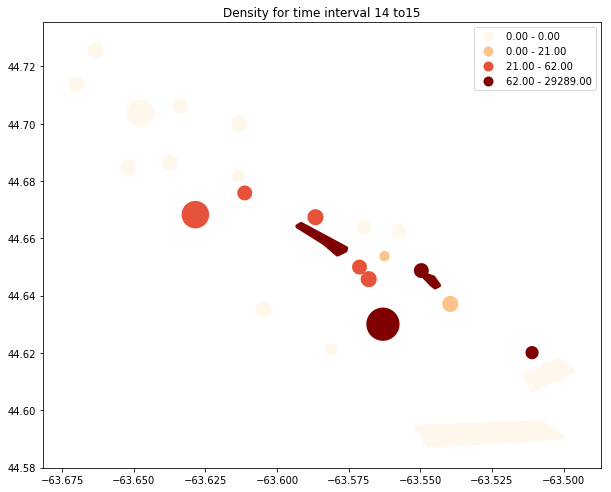

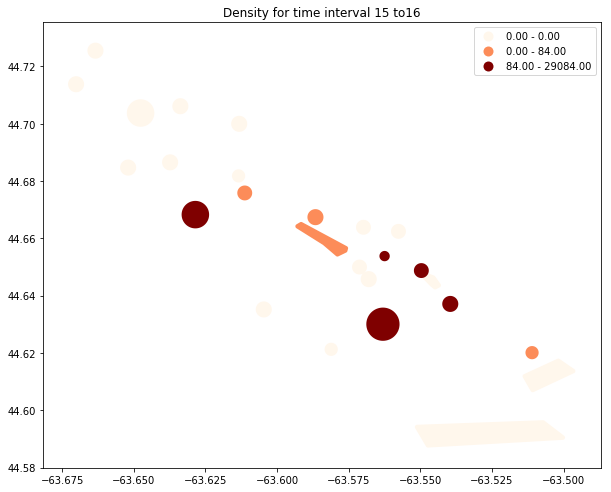

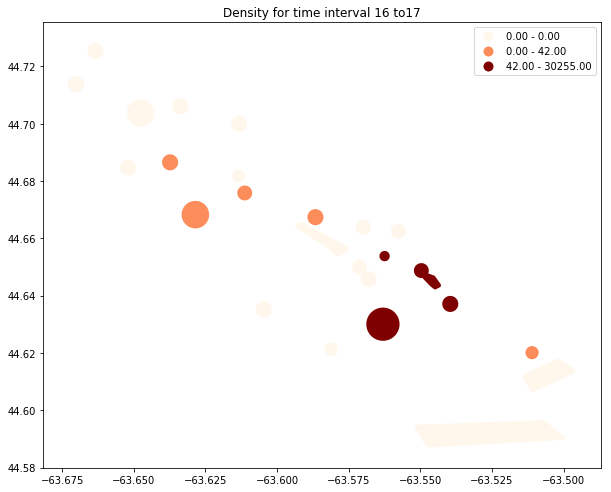

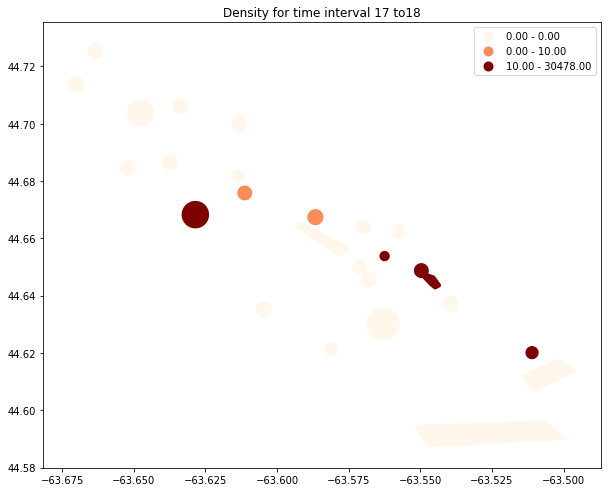

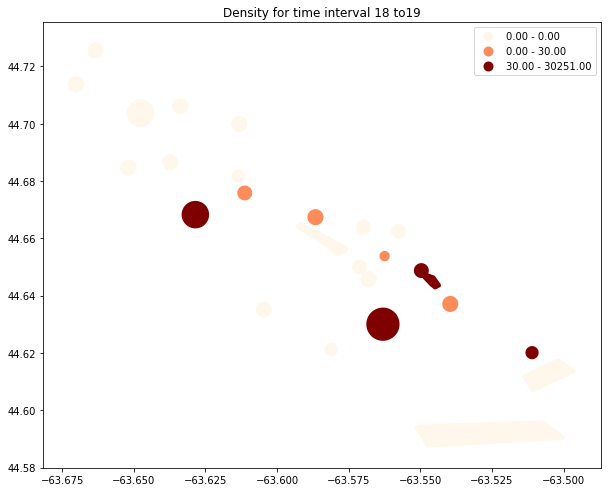

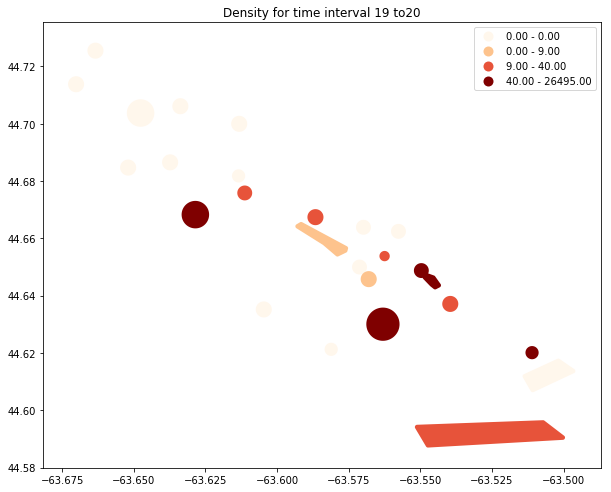

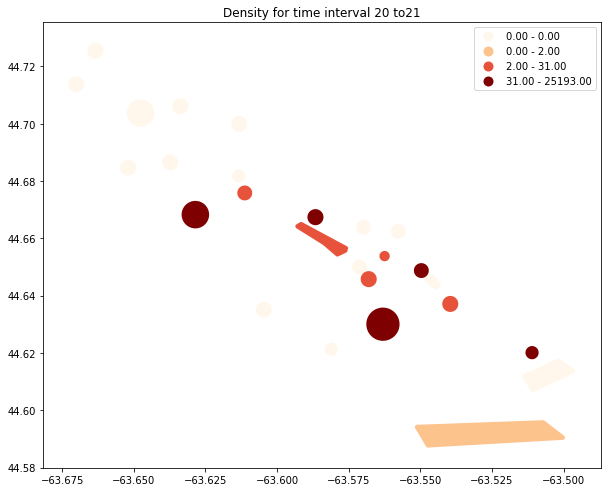

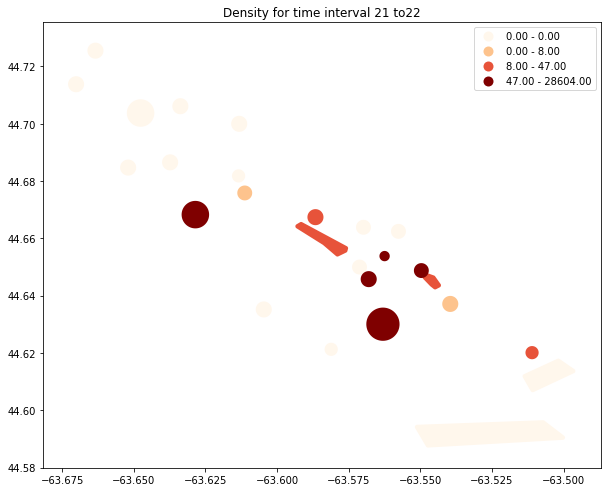

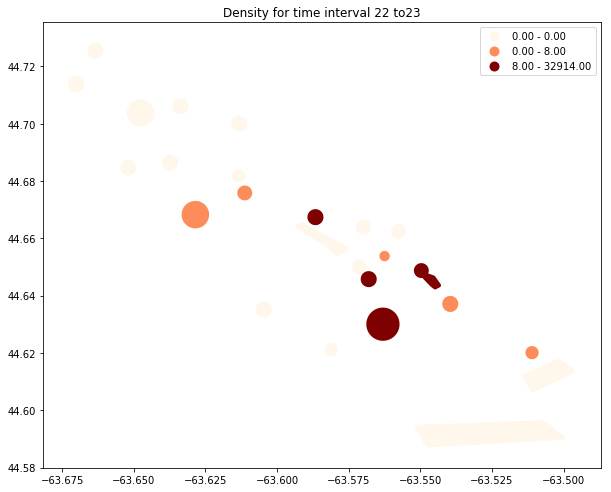

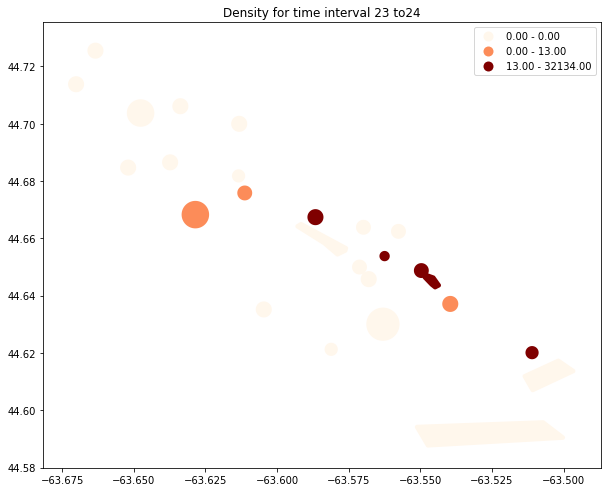

In [0]:
for i in range(24):
  hour='hour'+str(i)
  hour_gdf=bufferGeoFrame[['geometry',hour]]
  ax=hour_gdf.plot(column=hour,legend=True, cmap='OrRd', scheme='quantiles', figsize=(10,10))
  ax.set_title("Density for time interval "+str(i)+" to"+str(i+1))

## Q4. Temporal Chart

#### Port Selected - " waterfront h "

Reference: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-scatter

Text(0, 0.5, 'Number of vessels')

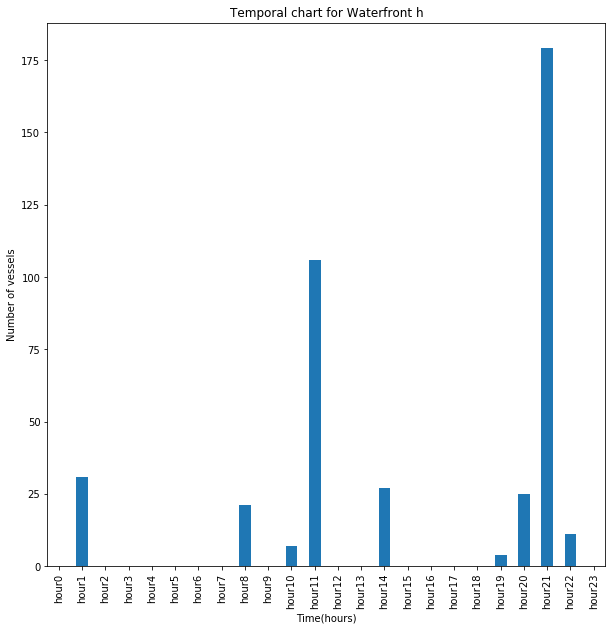

In [0]:
#extracting data from bufferGeoFrame DF for a selected port
port = bufferGeoFrame[bufferGeoFrame['portName']=='waterfront h'] 
temp_storage=port.set_index("portName") #setting index on port_name Ref: Lab5
temp_storage = temp_storage.loc["waterfront h"][1:25] #finding co-ordinate value of port "waterfront h" Ref: Lab5
ax=temp_storage.plot(kind="bar",figsize=(10,10))
ax.set_title('Temporal chart for '+ 'Waterfront h')
ax.set_xlabel('Time(hours)')
ax.set_ylabel('Number of vessels')  

## Q6. DBSCAN Implementation
Performing DBSCAN on 1000 records and dropping the column event_time as it is not required for DBSCAN

Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py 

In [0]:
dbScanDf=pd.read_csv('AISData.csv')

In [0]:
dbScanDf = dbScanDf.drop(columns=['event_time'])
newDBScanDataFrame = dbScanDf.head(1000)

In [0]:
newDBScanDataFrame = newDBScanDataFrame.dropna()

In [0]:
dbScan = DBSCAN(eps=3, min_samples = 5).fit(newDBScanDataFrame.astype(str))

In [0]:
labels = dbScan.labels_

In [0]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Number of clusters: %d' % n_clusters_)
print('Number of noise points: %d' % n_noise_)

Number of clusters: 7
Number of noise points: 822


Therefore, a total number of 7 clusters have been obtained for the data of 1000 vessels. 